seoul bike renting dataset
NN - chossing features using data analyitc graphs


In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("C:\\Users\\satya\\OneDrive\\Desktop\\keerthana\\ML\\SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
X = pd.get_dummies(df.drop("bike_count",axis=1))
y = df['bike_count']
X.head()

,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional_No,functional_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,True
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,True
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,True
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,True
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,True


In [9]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: bike_count, dtype: int64

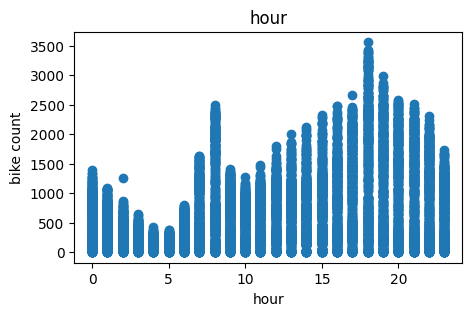

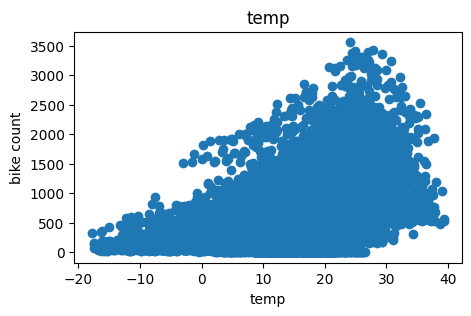

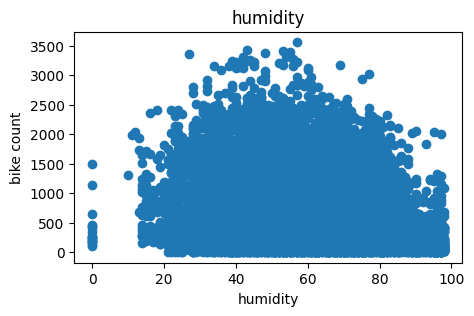

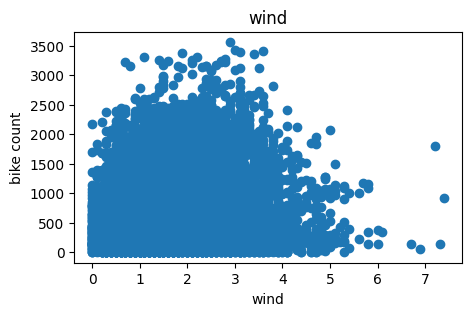

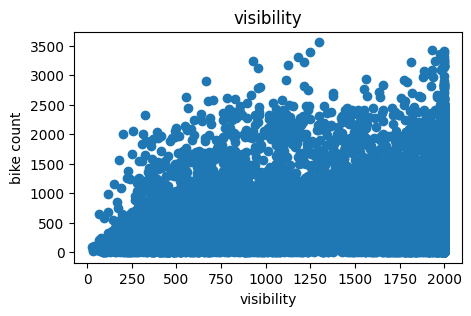

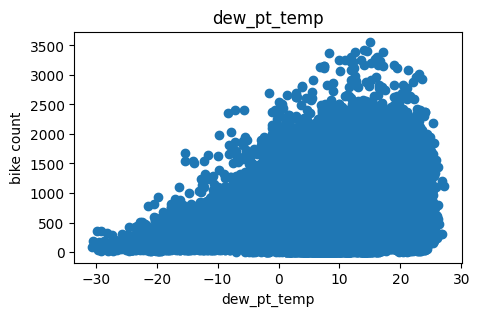

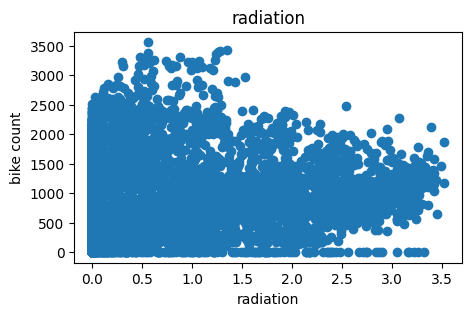

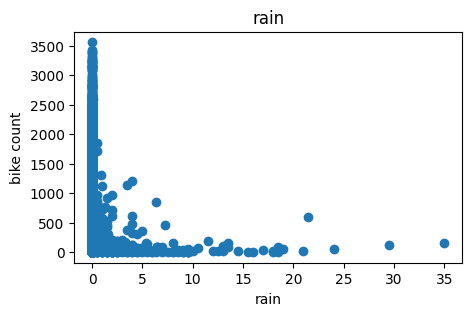

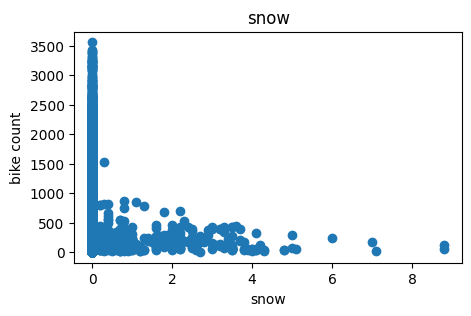

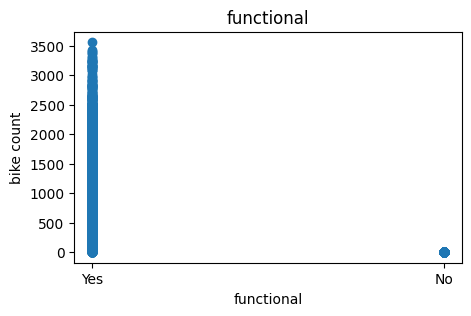

In [10]:
for label in df.columns[1:]:
    fig = plt.figure(figsize=(5,3))
    plt.scatter(df[label],df['bike_count'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("bike count")
    plt.show()


In [11]:
df = df.drop(["wind", "visibility", "functional","rain","snow","dew_pt_temp","radiation"], axis=1)

In [12]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity'], dtype='object')

In [13]:
X = pd.get_dummies(df.drop('bike_count', axis=1))
y = df['bike_count']
print(X.head())
print(y.head())

   hour  temp  humidity
0     0  -5.2        37
1     1  -5.5        38
2     2  -6.0        39
3     3  -6.2        40
4     4  -6.0        36
0    254
1    204
2    173
3    107
4     78
Name: bike_count, dtype: int64


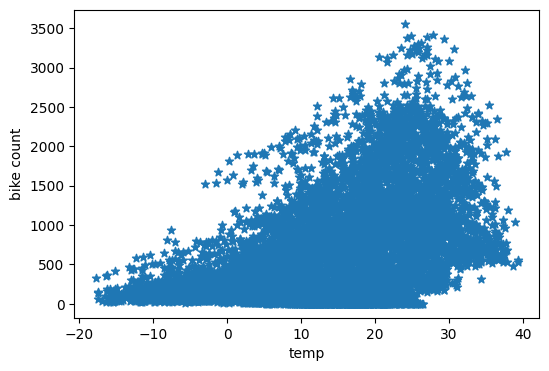

In [14]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df['temp'],df['bike_count'],marker='*')
plt.xlabel('temp')
plt.ylabel("bike count")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7008, 3)
(1752, 3)
(7008,)
(1752,)


In [16]:
print(X_train.dtypes)
print(y_train.dtypes)
print(X_test.dtypes)
print(y_test.dtypes)

hour          int64
temp        float64
humidity      int64
dtype: object
int64
hour          int64
temp        float64
humidity      int64
dtype: object
int64


In [17]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

In [18]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (7008, 3)
y_train shape: (7008,)


In [19]:
X_train.head()

,hour,temp,humidity
8415,15.0,13.2,61.0
5049,9.0,22.9,86.0
8395,19.0,11.2,46.0
1535,23.0,-2.6,69.0
5518,22.0,27.2,73.0


In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred

array([ 945.56952578, 1331.57838322, 1434.6869766 , ...,  697.53111721,
        -78.81917214, 1431.18440828])

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.4455467986207833

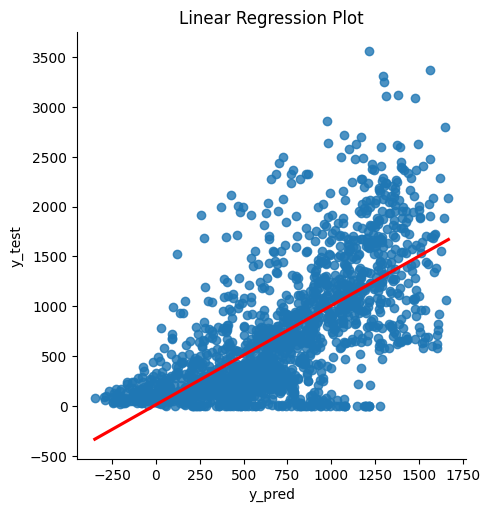

In [22]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

sns.lmplot(x='y_pred', y='y_test', data=df, ci=None, line_kws={'color': 'red'})  
plt.title("Linear Regression Plot")
plt.show()


Predictions: [ 799.23400899 1200.57843199 1383.03454891 ...  648.77173541   40.93505663
 1304.23809686]


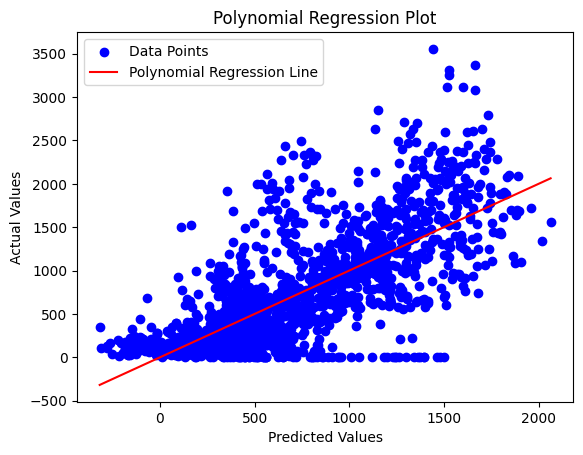

In [32]:

# Plot the scatter points
plt.scatter(y_pred, y_test, color='blue', label='Data Points')

# Plot the regression curve
x_range = np.linspace(min(y_pred), max(y_pred), 100)
plt.plot(x_range, x_range, color='red', label='Polynomial Regression Line')

plt.title("Polynomial Regression Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()

In [33]:
# put polynomial functions and try with themmmmmmmmmmmmmmmmmmmmmmmm